In [1]:
import pickle
import pandas as pd
import os
import numpy as np

dataset = pd.read_csv('C:/data/DSPM/ad_data.csv')

In [2]:
def rowColumn(df):
    print('Rows :', df.shape[0])
    print('Columns :', df.shape[1])

rowColumn(dataset)

Rows : 1000
Columns : 10


In [3]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#check the columns names and associated index.
cols = pd.Series(dataset.columns)
counter = 0
for x in cols:
    print(x,' : ' ,counter)
    counter+=1

Daily Time Spent on Site  :  0
Age  :  1
Area Income  :  2
Daily Internet Usage  :  3
Ad Topic Line  :  4
City  :  5
Male  :  6
Country  :  7
Timestamp  :  8
Clicked on Ad  :  9


In [24]:
#convert any string column to string ( Using NLP for feature engineering)
def dfTostr(df,col):
    master_str =list(df[col].values)
    master_str = ','.join(master_str)
    master_str = master_str.replace(","," ")
    return master_str

def listTostr(input_list):
    master_str = ','.join(input_list)
    master_str = master_str.replace(","," ")
    return master_str


string = dfTostr(dataset,'Ad Topic Line') #Input must be dataframe and the column name
#print(string)
#dataset.apply(lambda row: nltk.word_tokenize(row['Ad Topic Line']), axis=1)

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#Filter the words
def FilterTheWords(extracted_words):
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_words =  tokenizer.tokenize(extracted_words)
    print('Unfiltered Words :', len(tokenized_words))
    filtered_words = [w for w in tokenized_words if not w in stop_words]
    print('filtered Words :', len(filtered_words), '\n')
    return filtered_words

filtered_words = FilterTheWords(string)
#print(filtered_words)





Unfiltered Words : 3978
filtered Words : 3967 



In [15]:
# Count the number of words
import re
import collections
from collections import Counter

def orderedCount(filtered_words):
    text = filtered_words 
    nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
    filtered = [w for w in text if nonPunct.match(w)]
    counts = dict(Counter(filtered))
    sorted_x = sorted(counts.items(), key=lambda kv: -kv[1]) # '-' is used for reverse ordering
    return (dict(sorted_x))
            
Grouped_Ordered_counts = orderedCount(filtered_words)
#print(Grouped_Ordered_counts)

In [16]:
#Stemming (Stemming means that you stem the words e.g. 'ride' and 'riding' has the same stem)
from nltk.stem import PorterStemmer

ps = PorterStemmer()

ex = ["Python","Pythonly","Pythoning"]
for w in ex:
    print(ps.stem(w))


python
pythonli
python


In [17]:
#POS tagging

'''POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when'''


from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('averaged_perceptron_tagger')

# Create train and testing

train_text = filtered_words[:3000] # Can be changed according to the text.
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
test_text = filtered_words[3001:]
tokenized = custom_sent_tokenizer.tokenize(listTostr(test_text))

# Function to convert any set of data into Part of Speech
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
    except Exception as e:
        print((e))
    return dict(tagged)

POS_words = process_content()
#print(POS_words)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Saurabh Pathare\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
import os
os.getcwd()

#print(dataset['MONTH'])

'C:\\Users\\Saurabh Pathare'

In [19]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#for i in Grouped_Ordered_counts.keys():  # As most of the titles are action verbs
    #print(lemmatizer.lemmatize(i,pos = 'v'))



In [11]:
# Feature Engineering
import datetime

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Date'] = dataset['Timestamp'].map(lambda x: x.strftime('%Y-%m-%d'))
dataset['Time'] = dataset['Timestamp'].map(lambda x: x.strftime('%H:%M:%S'))
dataset.drop(columns = ['Timestamp'],axis = 1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016-06-03,03:36:18
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,2016-05-19,14:30:17
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,2016-01-28,20:59:32
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,1,2016-03-07,01:40:15
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,2016-04-18,09:33:42
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,2016-07-11,01:42:51


In [20]:
X = dataset.drop(columns =['Clicked on Ad'])
y = dataset.iloc[:,[9]]

In [25]:
# Feature Engineering using Tfid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_text = dataset['Ad Topic Line']
y_text = dataset['Clicked on Ad']

def textTofeatures(X_text, y_text, size):
    X_train, X_test, y_train, y_test = train_test_split(X_text, y_text, test_size = size ,random_state = 0)
    tfidf_Vec = TfidfVectorizer(stop_words = stop_words,tokenizer=word_tokenize).fit(X_train)
    df_train = pd.DataFrame(tfidf_Vec.transform(X_train).todense(), columns = tfidf_Vec.get_feature_names())
    df_test = pd.DataFrame(tfidf_Vec.transform(X_test).todense(), columns = tfidf_Vec.get_feature_names())
    return df_train, df_test

df_train, df_test = textTofeatures(X_text,y_text, 0.2)

E:\Program Files\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [26]:
df_train.head()
df_test.head()
rowColumn(df_train)
rowColumn(df_test)

Rows : 800
Columns : 315
Rows : 200
Columns : 315


In [27]:
numeric_text_df = pd.concat([df_train, df_test]) #merge both the dataset to get a complete numeric dataset
rowColumn(numeric_text_df)

Rows : 1000
Columns : 315


In [28]:
# To seperate categorical and numerical dataset
def CategoricalSeparator(df):
    dfnum = df.drop(df.select_dtypes(['object']),axis = 1)
    dfcategorical = df.drop(df.select_dtypes(['float','int64','int','datetime64[ns]']),axis = 1)
    return dfnum, dfcategorical #this function takes one data frame an

df_continuous, df_discrete = CategoricalSeparator(X)


In [29]:
df_discrete.head() #check the discrete

,Ad Topic Line,City,Country,Date,Time
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27,00:53:11
1,Monitored national standardization,West Jodi,Nauru,2016-04-04,01:39:02
2,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13,20:35:42
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10,02:31:19
4,Robust logistical utilization,South Manuel,Iceland,2016-06-03,03:36:18


In [30]:
df_discrete = df_discrete.drop(columns = ['Ad Topic Line'])

In [31]:
df_continuous.head() #check the continuous

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18


In [32]:
df_continuous = df_continuous.drop(columns = ['Timestamp'])

In [33]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
categorical_cols = list(df_discrete.columns)
# apply labelencoder_X on categorical feature columns
df_discrete[categorical_cols] = df_discrete[categorical_cols].apply(lambda col: labelencoder_X.fit_transform(col))
print(categorical_cols)

['City', 'Country', 'Date', 'Time']


In [34]:
df_discrete.head(10)

,City,Country,Date,Time
0,961,215,86,41
1,903,147,92,62
2,111,184,72,841
3,939,103,9,90
4,805,96,151,134
5,282,158,136,595
6,46,145,27,861
7,671,12,66,64
8,884,82,105,407
9,712,78,189,67


In [35]:
X = pd.concat([df_continuous, df_discrete],join='inner', axis=1) #merge both the dataset to get a complete numeric dataset
X.reset_index(drop=True, inplace=True)
numeric_text_df.reset_index(drop=True, inplace=True)
X = pd.concat([X, numeric_text_df],axis=1, ignore_index= False)

In [36]:
rowColumn(X)

Rows : 1000
Columns : 324


In [37]:
X.isna().sum() # always check the missing value in the dataset.

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
City                        0
Country                     0
Date                        0
Time                        0
24/7                        0
24hour                      0
3rdgeneration               0
4thgeneration               0
5thgeneration               0
6thgeneration               0
ability                     0
access                      0
actuating                   0
adapter                     0
adaptive                    0
administration              0
advanced                    0
algorithm                   0
alliance                    0
ameliorated                 0
analyzer                    0
analyzing                   0
application                 0
approach                    0
architecture                0
                           ..
team-oriented               0
tertiary                    0
throughput

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 0)

X_train.values.reshape(-1, 1)
X_test.values.reshape(-1, 1)
y_train.values.reshape(-1, 1)
y_test.values.reshape(-1, 1)

rowColumn(X_train)
rowColumn(X_test)
rowColumn(y_train)
rowColumn(y_test)

Rows : 750
Columns : 324
Rows : 250
Columns : 324
Rows : 750
Columns : 1
Rows : 250
Columns : 1


# OLS REGRESSION 

In [53]:
# Ordinary least squares regression
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # add a constant term
model = sm.OLS(y_train.astype(float), X_train.astype(float))
results = model.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Clicked on Ad   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     11.43
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          6.29e-110
Time:                        22:59:05   Log-Likelihood:                 286.48
No. Observations:                 750   AIC:                             53.03
Df Residuals:                     437   BIC:                             1499.
Df Model:                         312                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -14.1593      6.299     -2.248      0.025     -26.540      -1.779
Daily Time Spent on Site    -0.0126      0.001    -16.075      0.000      -0.014      -0.011
Age                          0.0088      0.001      6.792      0.000       0.006       0.011
Area Income              -6.468e-06   8.29e-07     -7.801      0.000    -8.1e-06   -4.84e-06
Daily Internet Usage        -0.0053      0.000    -18.280      0.000      -0.006      -0.005
Male                        -0.0224      0.021     -1.083      0.279      -0.063       0.018
City                     -4.027e-05   3.66e-05     -1.101      0.271      -0.000    3.16e-05
Country                      0.0001      0.000      0.695      0.488      -0.000       0.000
Date                         0.0001      0.000      0.759      0.448      -0.000       0.000
Time                      3.198e-06   3.59e-05      0.089      0.929   -6.74e-05    7.38e-05
24/7                         9.2917      3.588      2.590      0.010       2.240      16.343
24hour                       9.2751      3.590      2.583      0.010       2.219      16.332
3rdgeneration                9.3741      3.599      2.605      0.010       2.300      16.448
4thgeneration                9.2195      3.600      2.561      0.011       2.144      16.295
5thgeneration                9.5049      3.597      2.642      0.009       2.435      16.575
6thgeneration                9.4597      3.596      2.631      0.009       2.392      16.527
ability                      9.8146      3.759      2.611      0.009       2.426      17.203
access                       9.6732      3.765      2.570      0.011       2.274      17.072
actuating                    9.5420      3.605      2.647      0.008       2.458      16.626
adapter                      9.7852      3.745      2.613      0.009       2.424      17.147
adaptive                     9.1861      3.588      2.560      0.011       2.134      16.238
administration               4.9693      1.942      2.558      0.011       1.152       8.787
advanced                     9.4736      3.577      2.648      0.008       2.443      16.504
algorithm                    9.7550      3.753      2.600      0.010       2.380      17.130
alliance                     9.7957      3.763      2.603      0.010       2.399      17.192
ameliorated                  9.4262      3.584      2.630      0.009       2.382      16.470
analyzer                    10.0549      3.743      2.687      0.007       2.699      17.411
analyzing                    9.4025      3.604      2.609      0.009       2.319      16.486
application                  9.9256      3.752      2.646      0.008       2.552      17.300
approach                     9.9388      3.750      2.650      0.008       2.569      17.309
architecture  

# DECISION TREE ALGORITHM

In [218]:
#Decision Tree Algorithm
from sklearn import tree
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
clf = DecisionTreeClassifier(max_depth=10,criterion='gini')
clf.fit(X_train, y_train)#fitting the tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [134]:
y_pred = clf.predict(X_test) # Predicton on test with entropy
print(y_pred)

[0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0]


In [136]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy:', round(accuracy, 4), '%.')

Accuracy: 94.4 %.


In [135]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred) #confusion matrix

array([[131,   5],
       [  9, 105]], dtype=int64)

In [217]:
#Feature importance

import operator
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
feat_imp = dict(zip(X.columns, clf.feature_importances_))
feat_imp = sorted(feat_imp.items(), key=operator.itemgetter(1),reverse=True)
feat_imp#sorted importance of all the features with respect to the entropy of the attribute

[('Daily Internet Usage', 0.6681764554106632),
 ('Daily Time Spent on Site', 0.18246622301280507),
 ('Area Income', 0.04291088050708471),
 ('bi-directional', 0.01056987389154164),
 ('phased', 0.010292837536536871),
 ('multi-tiered', 0.010030465373267605),
 ('Date', 0.00986502637655635),
 ('City', 0.008071385217182469),
 ('Country', 0.007473504830724507),
 ('Age', 0.007202496893564692),
 ('team-oriented', 0.00673650167533881),
 ('implemented', 0.005237556478202573),
 ('business-focused', 0.005206473056966947),
 ('encompassing', 0.00509771697927314),
 ('secured', 0.004587945281345824),
 ('throughput', 0.0044841028984347045),
 ('context-sensitive', 0.0035872823187477632),
 ('hierarchy', 0.002690461739060823),
 ('frame', 0.0026733250400858967),
 ('de-engineered', 0.00263948548261649),
 ('Male', 0.0),
 ('Time', 0.0),
 ('24/7', 0.0),
 ('24hour', 0.0),
 ('3rdgeneration', 0.0),
 ('4thgeneration', 0.0),
 ('5thgeneration', 0.0),
 ('6thgeneration', 0.0),
 ('ability', 0.0),
 ('access', 0.0),
 ('ac

# RANDOM FOREST REGRESSOR

In [151]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
# Train the model on training data
rf.fit(X_train, y_train)

E:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [149]:
# Use the forest's predict method on the test data
y_pred_forest = rf.predict(X_test)
print(y_pred_forest, '\n')
# Calculate the absolute errors
errors = abs(y_pred_forest - y_test.values)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

[0.  0.  0.  1.  0.1 1.  1.  0.9 0.2 0.8 0.  0.4 1.  0.  0.  0.2 1.  0.
 1.  0.  0.  0.  0.  0.  1.  0.1 1.  0.  0.  0.  0.  1.  0.  1.  0.6 0.
 0.  0.  0.  0.  0.  1.  1.  0.  1.  0.2 0.  1.  0.1 1.  0.  0.  1.  0.9
 0.2 1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.1 1.  0.7 0.
 1.  0.4 0.  0.  1.  0.  1.  0.  1.  1.  0.  0.9 0.  1.  1.  0.  1.  0.3
 0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.2 1.  0.  1.
 0.  0.  1.  1.  1.  1.  0.  0.  1.  0.3 0.  1.  0.  0.  0.  0.  0.  0.
 0.  0.  0.1 1.  0.  0.  0.  1.  0.  0.  0.5 0.  0.7 1.  0.  1.  1.  1.
 0.6 1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.9 0.
 0.  0.1 0.4 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.2 0.  0.9 0.  1.  0.2
 1.  0.8 0.8 0.9 0.  1.  0.  0.9 0.5 0.  0.  1.  1.  0.2 0.1 1.  1.  0.9
 0.  1.  0.  1.  1.  0.  0.9 0.  0.1 0.  1.  1.  1.  0.5 0.  0.  0.4 1.
 0.3 0.  0.  0.  0.  0.  0.  0.9 1.  0.7 0.6 0.  1.  1.  0.1 0.  1.  1.
 0.6 1.  0.  1.  1.  0.6 0.  1.  0.  0.5 1.  0.3 1.  0.  1. 

In [142]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
pscore = accuracy_score(y_test, y_pred_forest.round())
print('Accuracy:', round(pscore, 4)*100, '%.')

Accuracy: 96.0 %.


In [145]:
confusion_matrix(y_test, y_pred_forest.round()) #confusion matrix

array([[131,   5],
       [  5, 109]], dtype=int64)

# LOGISTIC REGRESSION

In [225]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
print(y_pred_log)




[0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0]


E:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [157]:
accuracy_log = accuracy_score(y_test,y_pred_log)*100
print('Accuracy:', round(accuracy_log, 4), '%.')

Accuracy: 94.0 %.


In [165]:
confusion_matrix(y_test, y_pred_log.round()) #confusion matrix

array([[131,   5],
       [ 10, 104]], dtype=int64)

In [240]:
#Plot an ROC curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

n_classes = y.shape[1]
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)
#print(fpr)
#print(tpr)
#print(thresholds)
print("Area of Curve:", round(roc_auc,3), "%")



Area of Curve: 0.971 %


E:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


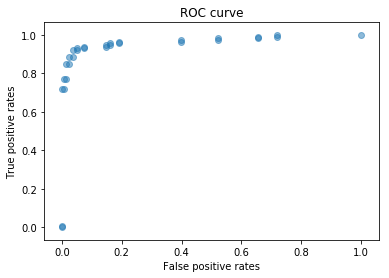

In [241]:
#Plot the ROC curve

import matplotlib.pyplot as plt
# Plot

plt.scatter(fpr, tpr, alpha=0.5)
plt.title('ROC curve')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.show()

In [208]:
#Test if the model is overftting, underfitting or valid

'''Training error is low but is much lower than testing error - overfitting
Both errors are low - ok
Both errors are high - underfitting
Training error is high but testing is low - error in implementation or very small dataset'''

def modelTest(model):
    training_error = 1- model.score(X_train,y_train)
    print("Training error:" , round(training_error,4))
    test_error = 1- model.score(X_test,y_test)
    print("Test error:" , round(test_error,4))

modelTest(clf)

Training error: 0.0027
Test error: 0.056


# Naive Bayes ALGORITHM

In [228]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(y_pred_gnb)

[0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0]


E:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
def accuracyConfusion(y_pred):
    accuracy_log = accuracy_score(y_test,y_pred)*100
    print('Accuracy:', round(accuracy_log, 4), '%')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred.round())) #confusion matrix

accuracyConfusion(y_pred_gnb)

Accuracy: 96.4 %
Confusion Matrix:
 [[131   5]
 [  4 110]]


In [235]:
modelTest(gnb)

Training error: 0.0333
Test error: 0.036
